# Let's play with a baboon!

## Application of Singular Value Decomposition (SVD)

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
rcParams['figure.figsize'] = (10,8)
from PIL import Image
plt.gray();
from plot_helper import *
#

<Figure size 720x576 with 0 Axes>

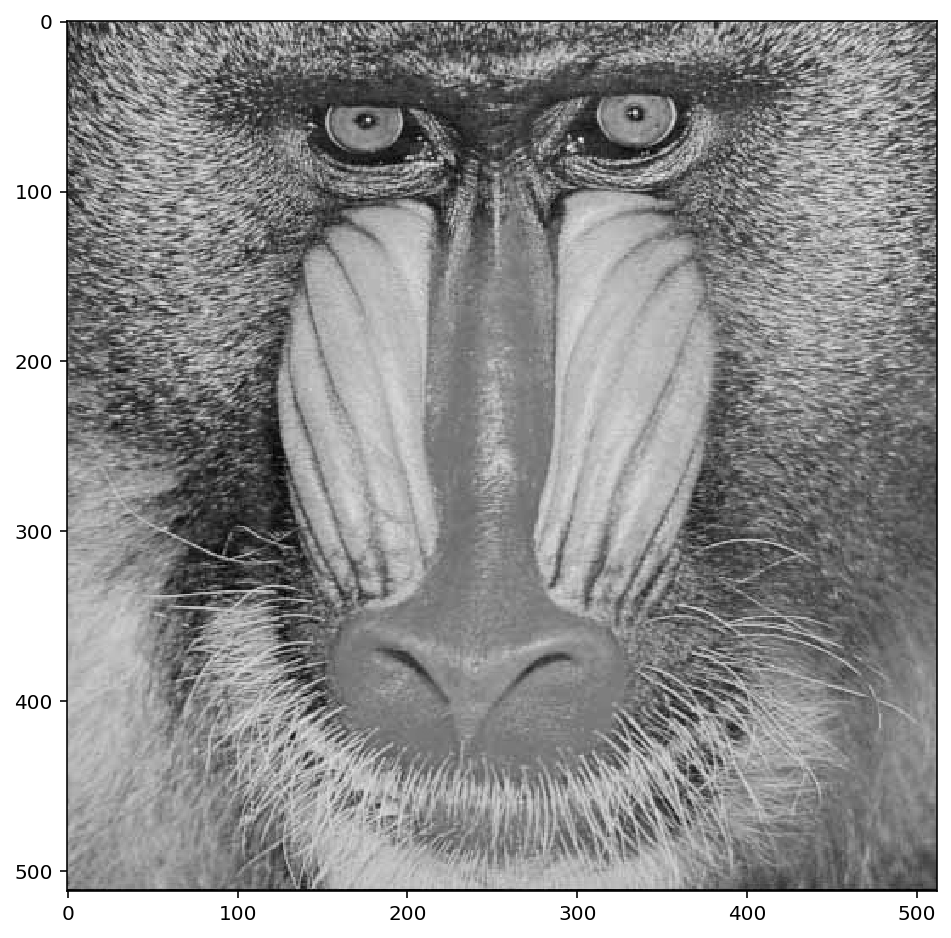

In [8]:
baboon = Image.open("./baboon.png")
baboon = np.array(baboon)
plt.imshow(baboon);
#

In [9]:
%%time
U, s, VT = np.linalg.svd(baboon)

CPU times: user 369 ms, sys: 62.4 ms, total: 432 ms
Wall time: 84.1 ms


In [10]:
U.shape,s.shape,VT.shape

((512, 512), (512,), (512, 512))

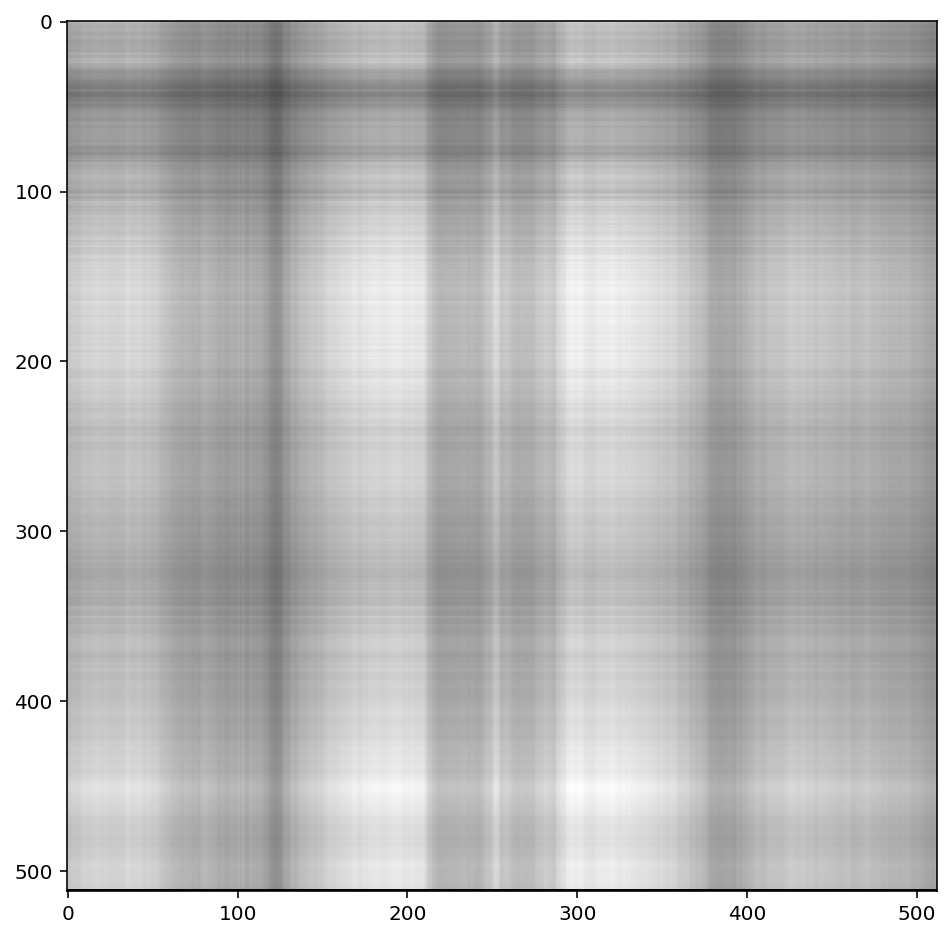

In [12]:
a_img = U[:,:1] @ np.diag(s[:1]) @ VT[:1,:]
plt.imshow(a_img);

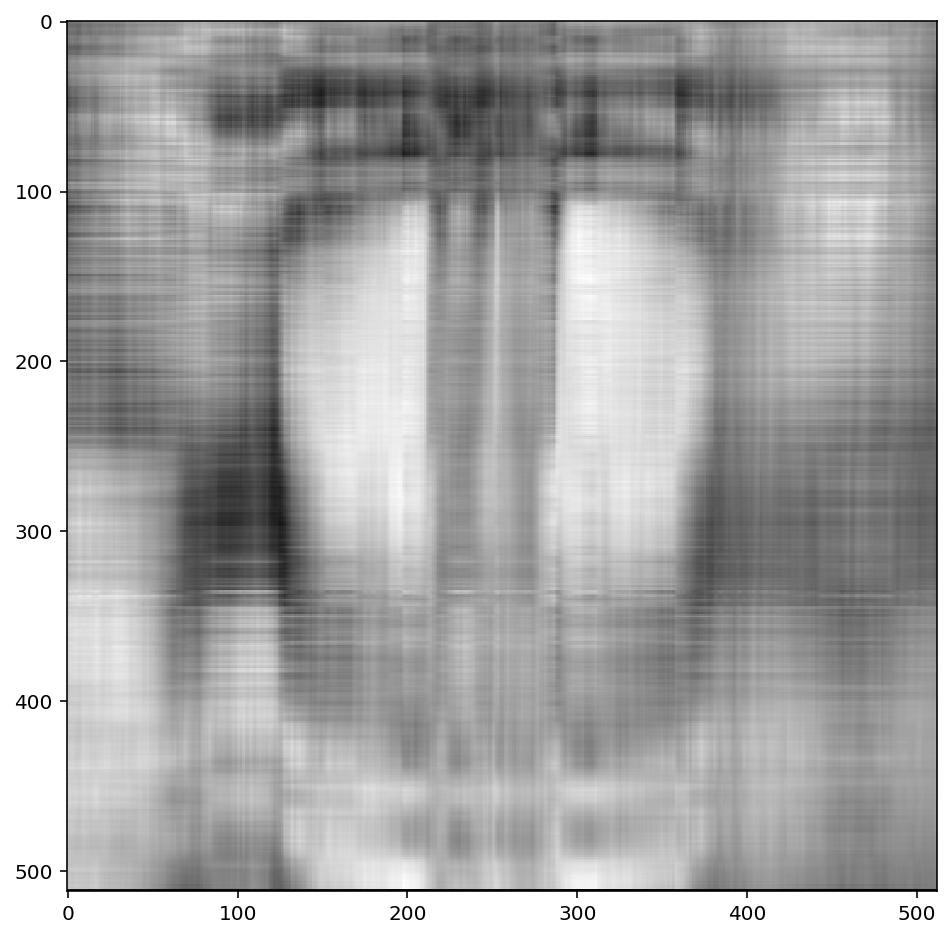

In [13]:
a_img = U[:, :5] @ np.diag(s[:5]) @ (VT[:5, :])
plt.imshow(a_img);

For every $m \times n$ matrix $A$ of rank $r$, 

$A = U \Sigma V^T = \sigma_1 u_1 v_1^T + \cdots + \sigma_r u_r v_r^T$

In [16]:
def approx_rank_k_img(k, U, s, Vh, image):
    U_k = U[:,:k]
    s_k = s[:k]
    Vh_k = Vh[:k,:]
    a_img = np.round(U_k @ np.diag(s_k) @ Vh_k)
    diff = image - a_img
    
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(20,8))
    ax0.imshow(image)
    ax0.set_title('Original')
    
    ax1.imshow(a_img)
    ax1.set_title(f'Rank {k} approximation')
    
    ratio = image.size / (U_k.size + s_k.size + Vh_k.size)
    norm = np.linalg.norm(diff)
    plt.subplots_adjust(top=0.85)
    fig.suptitle(f'$k = {k}$, Element compression ratio = {ratio:.2f}, norm = {norm:.2f}', fontsize=16)

In [17]:
from ipywidgets import widgets, fixed
k_slider = widgets.IntSlider(min=1, max=200, step=5, continuous_update=False)

In [18]:
widgets.interact(approx_rank_k_img, k=k_slider, U=fixed(U),
                 s=fixed(s), Vh=fixed(Vh), image=fixed(baboon));

interactive(children=(IntSlider(value=1, continuous_update=False, description='k', max=200, min=1, step=5), Ou…

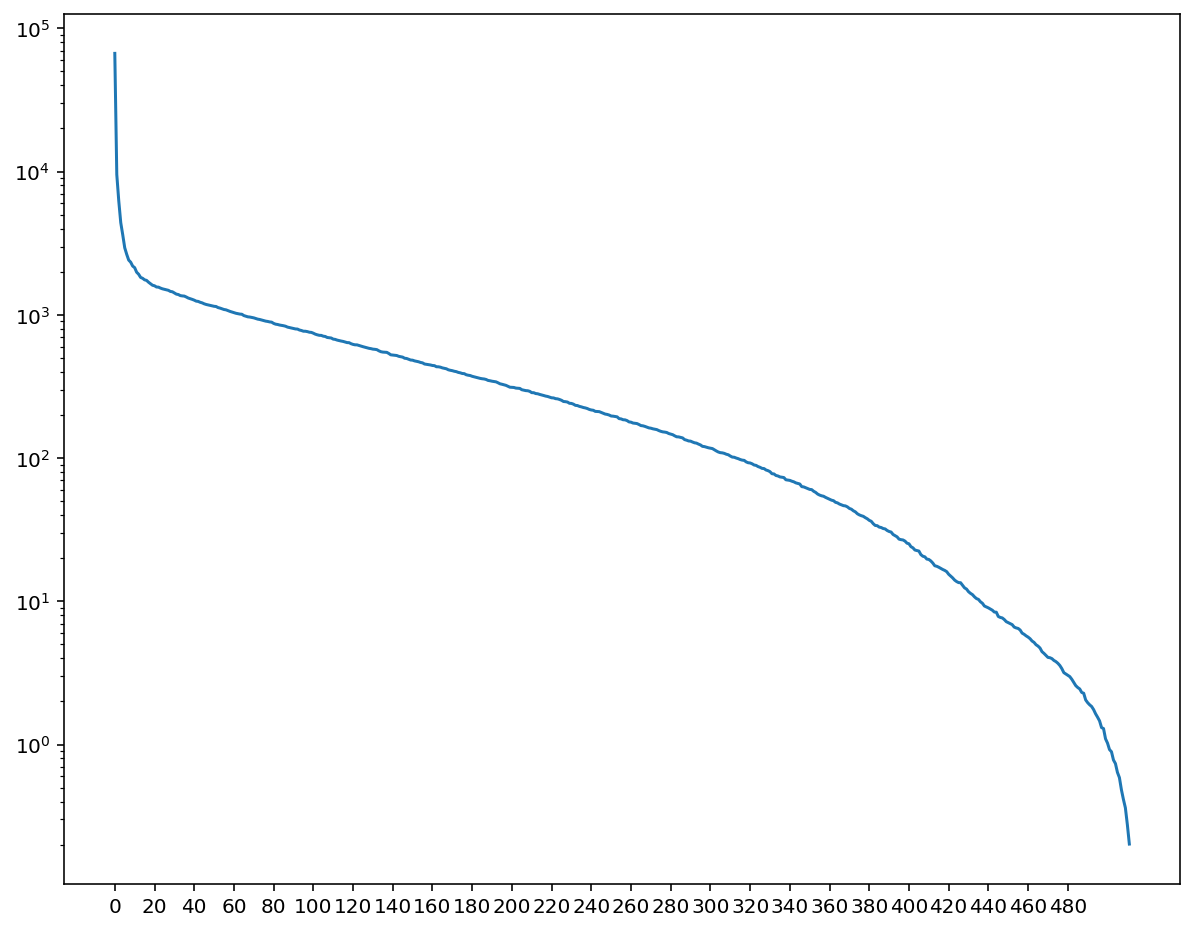

In [19]:
plt.plot(s)
plt.yscale('log')
plt.xticks(np.arange(0,500,20));

In [20]:
pct_s = np.cumsum(s)/np.sum(s) * 100

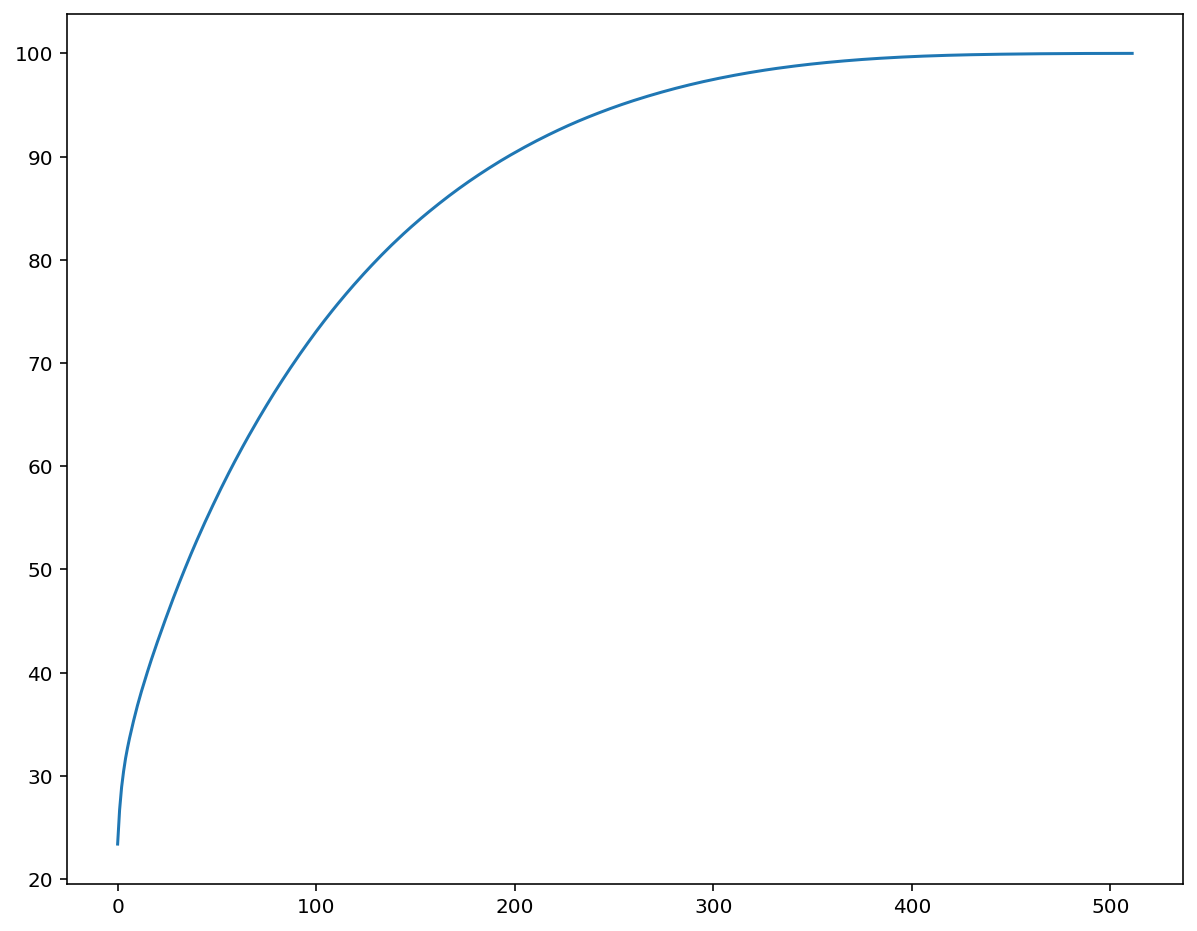

In [21]:
plt.plot(pct_s);

In [22]:
np.where(pct_s>80)[0][0]

131

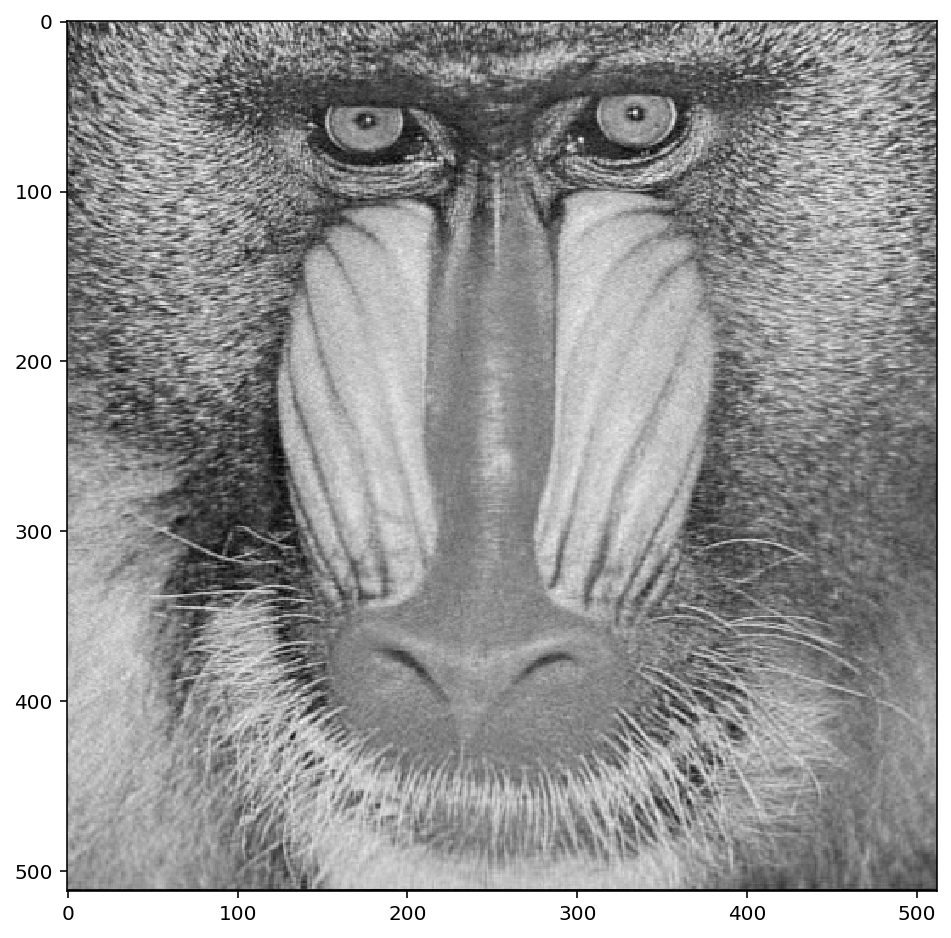

In [23]:
a_img = U[:, :130] @ np.diag(s[:130]) @ (Vh[:130, :])
plt.imshow(a_img);

## What's there in the rest?

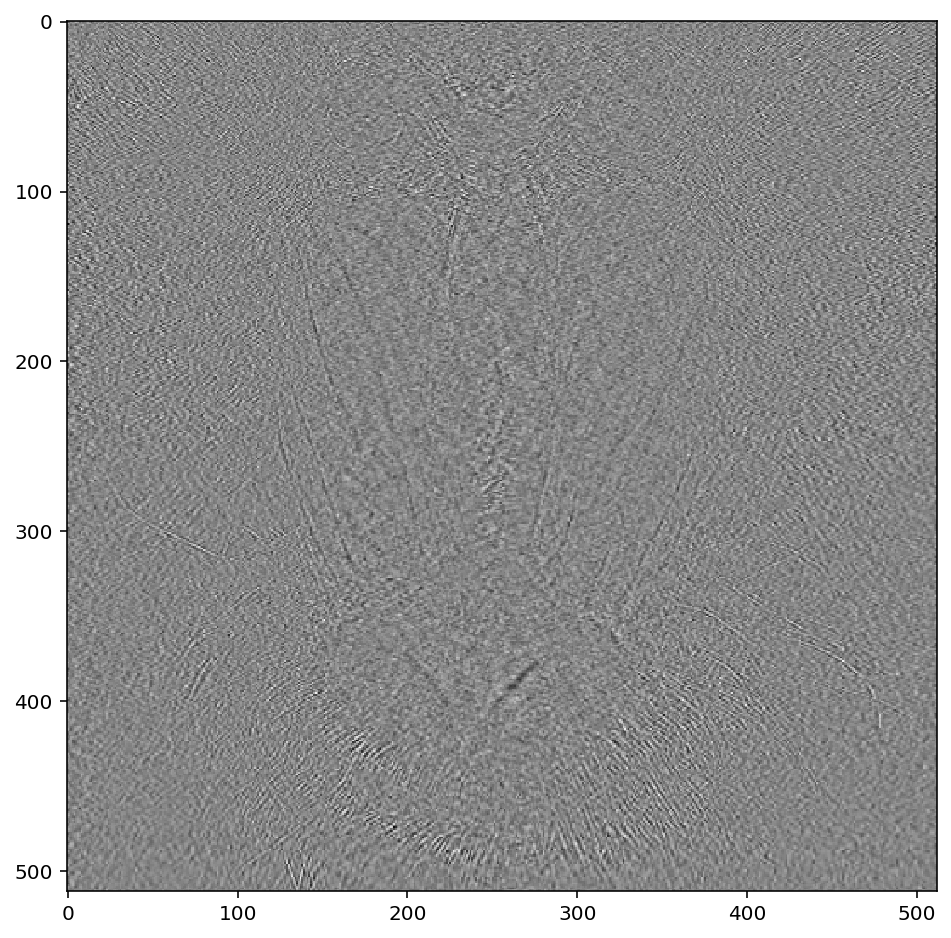

In [24]:
a_img = U[:, 130:] @ np.diag(s[130:]) @ (Vh[130:, :])
plt.imshow(a_img);

# References

1. https://stats.stackexchange.com/questions/177102/what-is-the-intuition-behind-svd/179042